In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [87]:
RANDOM_SEED = 42

In [3]:
df = pd.read_csv('ml_project\data\heart_cleveland_upload.csv')

In [137]:
# Let's look at the number of unique values for all features and divide them into categorical and numerical
df.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [138]:
def get_features_type(X):

    cat_feats = X.nunique()[X.nunique() < 10].index.tolist()
    num_feats = [x for x in X.columns if x not in cat_feats]

    return cat_feats, num_feats

In [141]:
cat_features, num_features = get_features_type(df)

## Numerical features

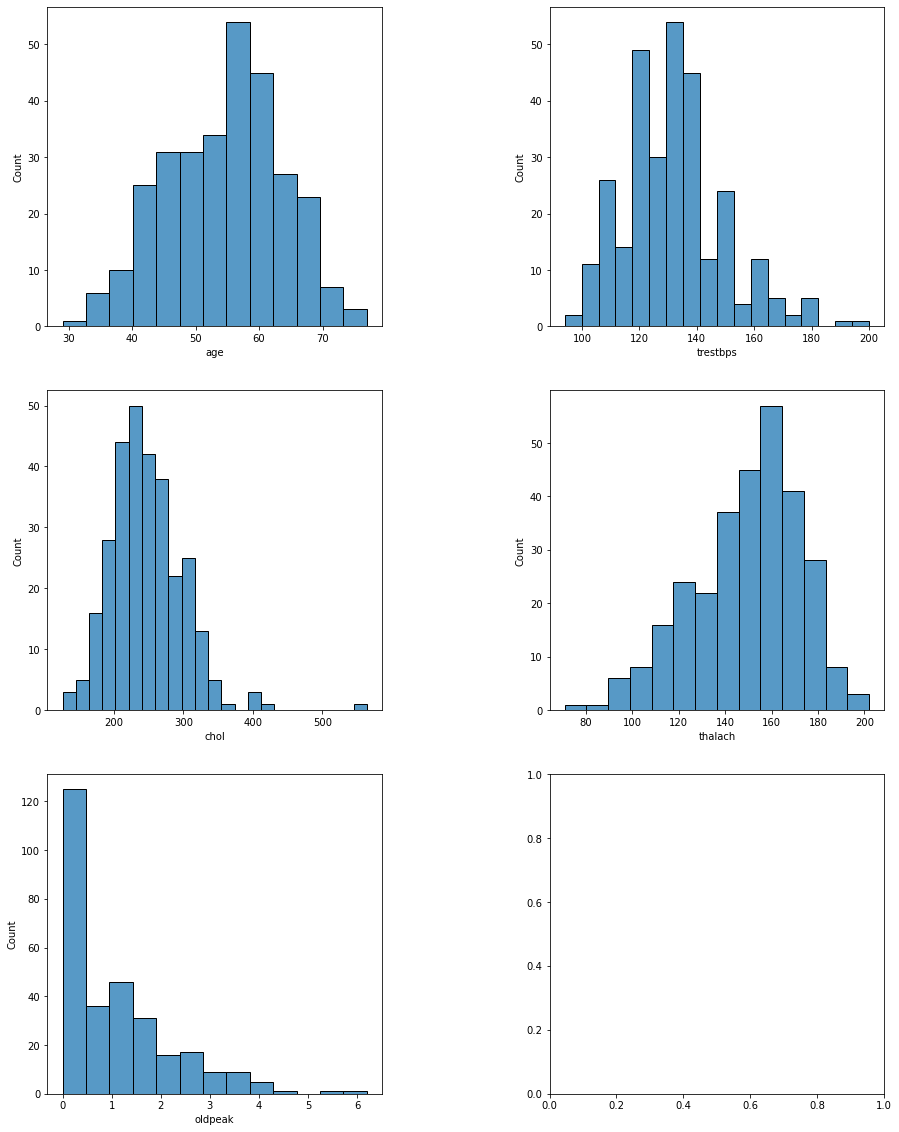

In [73]:
fig,axes = plt.subplots(3, 2, figsize=(15,20))
plt.subplots_adjust(wspace=0.5)
axes = axes.flatten()

for i in range(len(num_features)):
    sns.histplot(df[num_features[i]], ax=axes[i])    


All features have an approximately normal distribution except for oldpeak, which looks like an exponential distribution. Let's take the logarithm of it

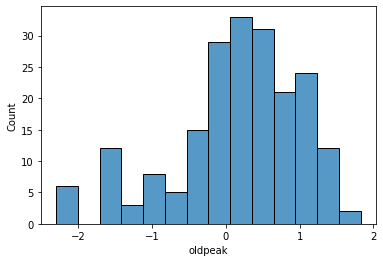

In [56]:
# log the oldpeak column
sns.histplot(df['oldpeak'].apply(lambda x: np.log(x)))    


## Categorical features

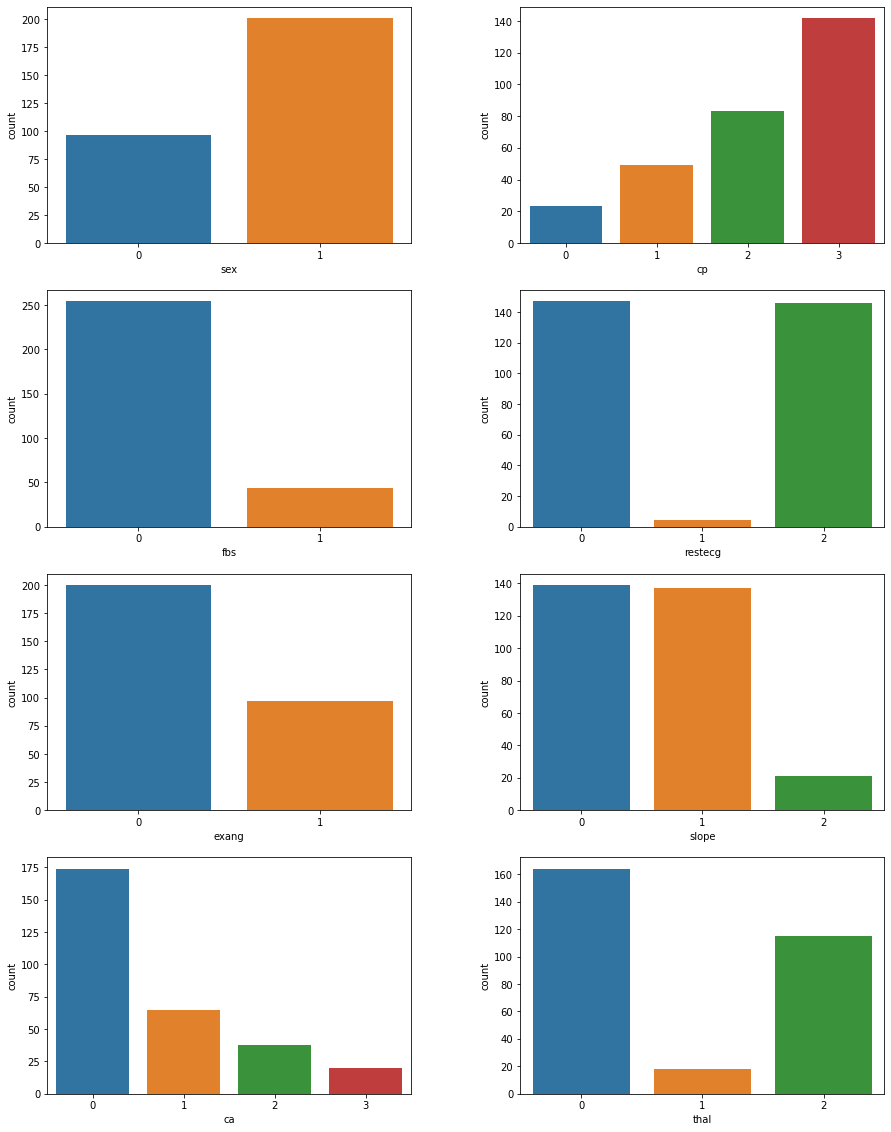

In [75]:
fig,axes = plt.subplots(4, 2, figsize=(15,20))
plt.subplots_adjust(wspace=0.3)
axes = axes.flatten()
for i in range(len(cat_features)):
    sns.countplot(x=cat_features[i], data=df, ax=axes[i])

## Target

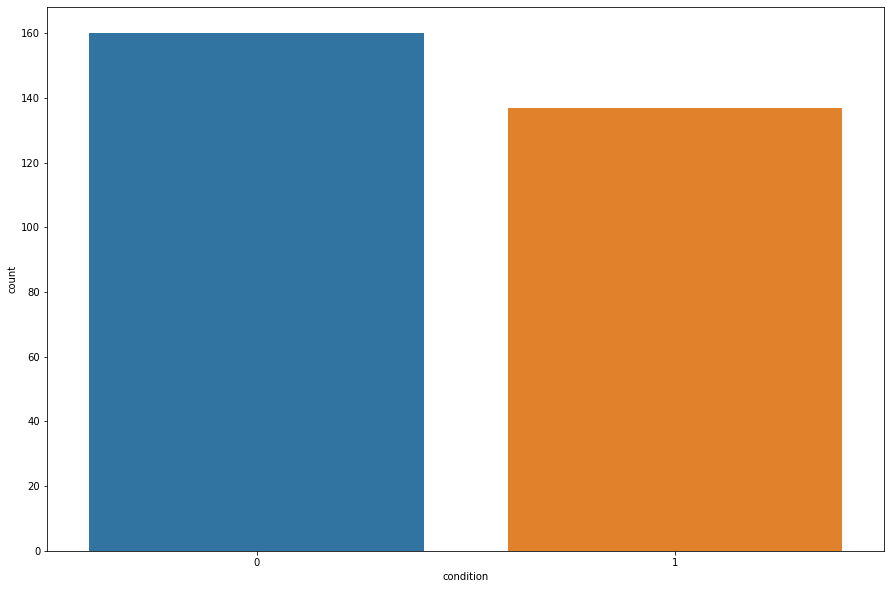

In [77]:
sns.countplot(x='condition', data=df)

Target is balanced.

## Correlations

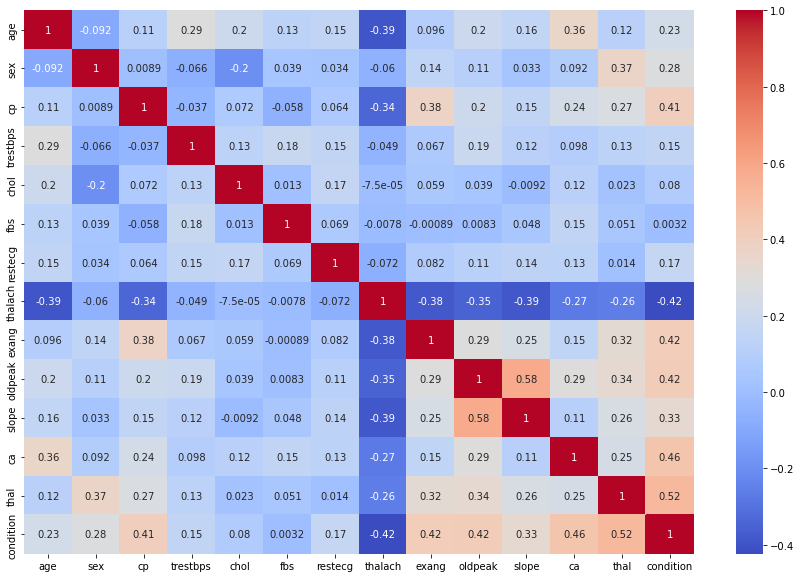

In [70]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap((df).corr(),cmap='coolwarm', annot=True)